In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


In [2]:
# Load the dataset
dataset = pd.read_csv("C://Users//sanke//Downloads//LP VI (1)//LP VI//dl//GOOGL.csv")
data = dataset[['Close']].values.astype(float)


In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, scaled_data, test_size=0.2, random_state=42)

In [5]:
# Reshape input data to be 3-dimensional (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [6]:
# Model Architecture
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

In [7]:
# Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
111/111 [==============================] - 8s 7ms/step - loss: 0.0466
Epoch 2/10
111/111 [==============================] - 1s 7ms/step - loss: 0.0129
Epoch 3/10
111/111 [==============================] - 1s 7ms/step - loss: 0.0010
Epoch 4/10
111/111 [==============================] - 1s 7ms/step - loss: 8.6035e-05
Epoch 5/10
111/111 [==============================] - 1s 7ms/step - loss: 7.7829e-05
Epoch 6/10
111/111 [==============================] - 1s 7ms/step - loss: 7.0948e-05
Epoch 7/10
111/111 [==============================] - 1s 7ms/step - loss: 6.3271e-05
Epoch 8/10
111/111 [==============================] - 1s 7ms/step - loss: 5.5759e-05
Epoch 9/10
111/111 [==============================] - 1s 9ms/step - loss: 4.8608e-05
Epoch 10/10
111/111 [==============================] - 2s 15ms/step - loss: 4.1555e-05


In [8]:
# Prediction
predictions = model.predict(X_test)

28/28 [==============================] - 1s 6ms/step


In [11]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
# Calculate Root Mean Squared Error (RMSE) from MSE
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 3.851298258115865e-05
Root Mean Squared Error (RMSE): 0.006205882901018891


<Figure size 1000x500 with 0 Axes>

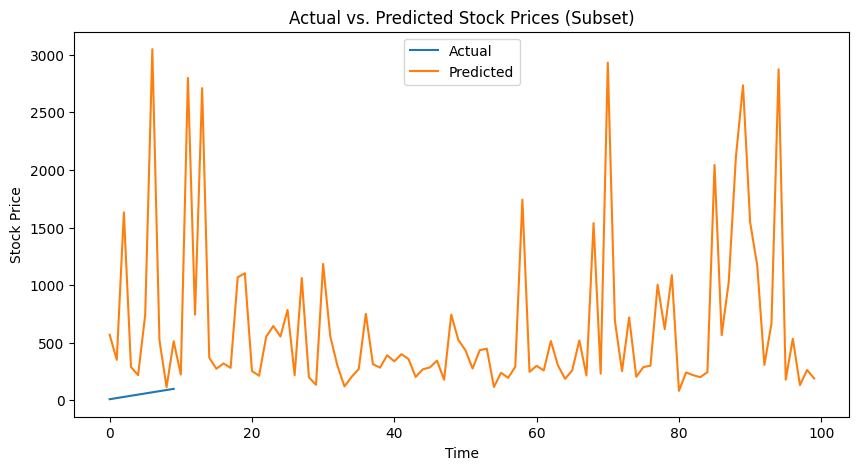

In [20]:
import matplotlib.pyplot as plt



# Assuming predictions are stored in a variable named predictions, you need to define predictions_inv first
predictions_inv = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten() # assuming inverse_transform is defined somewhere
# Select a subset of data to plot (e.g., first 100 data points)
subset_size = 100
y_test_subset = y_test_inv[:subset_size]
predictions_subset = predictions_inv[:subset_size]
# Plot actual vs. predicted stock prices for the subset
plt.figure(figsize=(10, 5))

# Plot actual vs. predicted stock prices for the subset
plt.figure(figsize=(10, 5))
plt.plot(y_test_subset, label='Actual')
plt.plot(predictions_subset, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices (Subset)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




NameError: name 'predictions_subset' is not defined

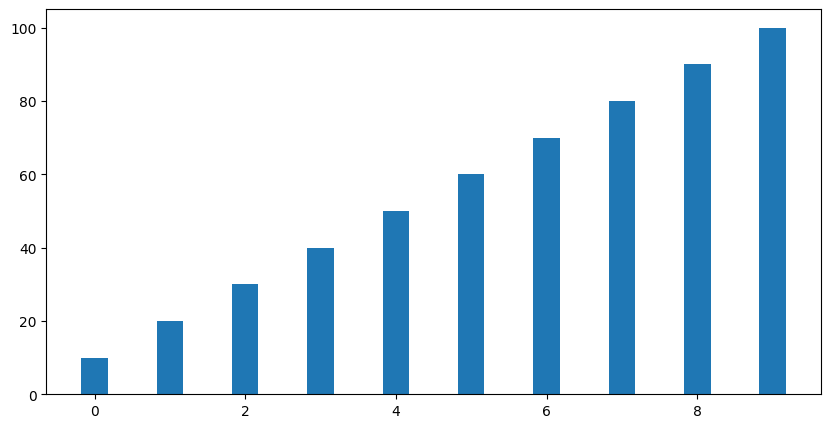

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Select a subset of data to plot (e.g., first 10 data points)
subset_size = 10
indices = np.arange(subset_size)

# Plot actual vs. predicted stock prices for the subset using a bar graph
plt.figure(figsize=(10, 5))
bar_width = 0.35
plt.bar(indices, y_test_subset[:subset_size].flatten(), bar_width, label='Actual')
plt.bar(indices + bar_width, predictions_subset[:subset_size].flatten(), bar_width, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices (Subset)')
plt.xticks(indices + bar_width / 2, indices)
plt.legend()
plt.show()
